In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dask.distributed import Client

In [2]:
# Let's load Dask to make Xarray more efficient
import dask.distributed as dsk

# Start client
try:
    clnt
except:
    clnt = dsk.Client()
clnt

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44831 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/44831/status,
Dashboard: /proxy/44831/status,Workers: 4
Total threads: 4,Total memory: 18.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40921,Workers: 4
Dashboard: /proxy/44831/status,Total threads: 4
Started: Just now,Total memory: 18.00 GiB
Comm: tcp://127.0.0.1:37827,Total threads: 1
Dashboard: /proxy/35539/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:34817,


In [3]:
in_path = '/g/data/hh5/tmp/WACI-Hackathon-2023/AUS2200/raw/day1/history/atm/netCDF/'

In [4]:
cldrad = xr.open_dataset(in_path+'umnsa_cldrad_20220221T1800_1h.nc', chunks={'lat': 100, 'lon': 100})
mdl = xr.open_dataset(in_path+'umnsa_mdl_20220221T1800_1h.nc', chunks={'lat': 100, 'lon_0': 100})
cldrad

<xarray.Dataset>
Dimensions:                   (time: 1, model_theta_level_number: 70,
                               lat: 2120, lon: 2600, bnds: 2)
Coordinates:
  * time                      (time) datetime64[ns] 2022-02-21T19:00:00
  * model_theta_level_number  (model_theta_level_number) int32 1 2 3 ... 69 70
  * lat                       (lat) float64 -48.79 -48.77 ... -6.852 -6.832
  * lon                       (lon) float64 107.5 107.5 107.6 ... 159.0 159.0
    theta_level_height        (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    sigma_theta               (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables: (12/13)
    fld_s00i012               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 70, 100, 100), meta=np.ndarray>
    latitude_longitude        int32 ...
    lat_bnds                  (lat, bnds) float64 dask.array<chunksize=(100, 2), meta=np.ndarray>
    lon_bnds                  (lon, bnds) float64 dask.array<chunksize=(100, 2), meta=np.ndarray>
    theta_level_height_bnds   (model_theta_level_number, bnds) float64 dask.array<chunksize=(70, 2), meta=np.ndarray>
    sigma_theta_bnds          (model_theta_level_number, bnds) float64 dask.array<chunksize=(70, 2), meta=np.ndarray>
    ...                        ...
    fld_s00i265               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 70, 100, 100), meta=np.ndarray>
    fld_s00i267               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 70, 100, 100), meta=np.ndarray>
    fld_s00i268               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 70, 100, 100), meta=np.ndarray>
    fld_s00i272               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 70, 100, 100), meta=np.ndarray>
    fld_s00i273               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 70, 100, 100), meta=np.ndarray>
    fld_s04i118               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 70, 100, 100), meta=np.ndarray>
Attributes:
    history:      File /g/data/hh5/tmp/WACI-Hackathon-2023/AUS2200/day1/20220...
    Conventions:  CF-1.6
    source:       Data from Met Office Unified Model
    um_version:   12.2

In [12]:
cldrad.lon[1] - cldrad.lon[0]# - cldrad.lat[0]

<xarray.DataArray 'lon' ()>
array(0.01979828)

In [5]:
T = mdl.fld_s16i004
T

<xarray.DataArray 'fld_s16i004' (time: 1, model_theta_level_number: 70,
                                 lat: 2120, lon_0: 2600)>
dask.array<open_dataset-4844ceeb4cb41d0193e90c9add1d7f68fld_s16i004, shape=(1, 70, 2120, 2600), dtype=float32, chunksize=(1, 70, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time                      (time) datetime64[ns] 2022-02-21T19:00:00
  * lat                       (lat) float64 -48.79 -48.77 ... -6.852 -6.832
  * lon_0                     (lon_0) float64 107.5 107.5 107.6 ... 159.0 159.0
  * model_theta_level_number  (model_theta_level_number) int32 1 2 3 ... 69 70
    theta_level_height        (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    sigma_theta               (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
Attributes:
    standard_name:    air_temperature
    long_name:        TEMPERATURE ON THETA LEVELS
    units:            K
    um_stash_source:  m01s16i004
    grid_mapping:     latitude_longitude

In [6]:
cli = cldrad.fld_s00i012
clw = cldrad.fld_s00i254
clr = cldrad.fld_s00i272
clg = cldrad.fld_s00i273

In [7]:
%%time
sum_hydro = cli + clw + clr + clg 

CPU times: user 11.9 ms, sys: 1.52 ms, total: 13.5 ms
Wall time: 19.8 ms


In [8]:
sum_hydro

<xarray.DataArray (time: 1, model_theta_level_number: 70, lat: 2120, lon: 2600)>
dask.array<add, shape=(1, 70, 2120, 2600), dtype=float32, chunksize=(1, 70, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time                      (time) datetime64[ns] 2022-02-21T19:00:00
  * model_theta_level_number  (model_theta_level_number) int32 1 2 3 ... 69 70
  * lat                       (lat) float64 -48.79 -48.77 ... -6.852 -6.832
  * lon                       (lon) float64 107.5 107.5 107.6 ... 159.0 159.0
    theta_level_height        (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    sigma_theta               (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>

In [9]:
sum_hydro_mask = sum_hydro > 0.00001
sum_hydro_mask

<xarray.DataArray (time: 1, model_theta_level_number: 70, lat: 2120, lon: 2600)>
dask.array<gt, shape=(1, 70, 2120, 2600), dtype=bool, chunksize=(1, 70, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time                      (time) datetime64[ns] 2022-02-21T19:00:00
  * model_theta_level_number  (model_theta_level_number) int32 1 2 3 ... 69 70
  * lat                       (lat) float64 -48.79 -48.77 ... -6.852 -6.832
  * lon                       (lon) float64 107.5 107.5 107.6 ... 159.0 159.0
    theta_level_height        (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    sigma_theta               (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>

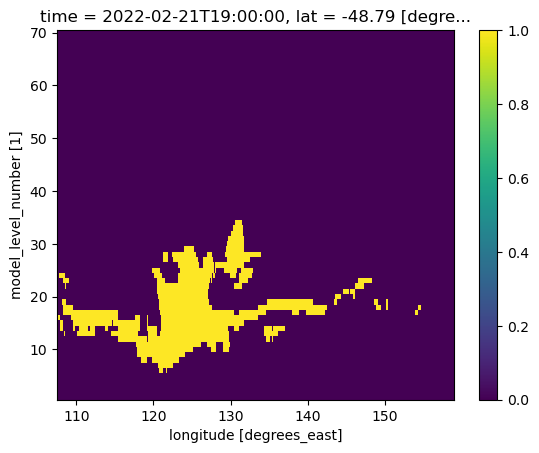

In [10]:
sum_hydro_mask[0,:,0,:].plot()

In [11]:
# sum_hydro_mask = sum_hydro_mask.reindex(model_theta_level_number=list(reversed(sum_hydro_mask.model_theta_level_number)))

In [12]:
sum_hydro_mask

<xarray.DataArray (time: 1, model_theta_level_number: 70, lat: 2120, lon: 2600)>
dask.array<gt, shape=(1, 70, 2120, 2600), dtype=bool, chunksize=(1, 70, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time                      (time) datetime64[ns] 2022-02-21T19:00:00
  * model_theta_level_number  (model_theta_level_number) int32 1 2 3 ... 69 70
  * lat                       (lat) float64 -48.79 -48.77 ... -6.852 -6.832
  * lon                       (lon) float64 107.5 107.5 107.6 ... 159.0 159.0
    theta_level_height        (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>
    sigma_theta               (model_theta_level_number) float64 dask.array<chunksize=(70,), meta=np.ndarray>

In [13]:
max_level = sum_hydro_mask.idxmin(dim='model_theta_level_number')
max_level

<xarray.DataArray 'model_theta_level_number' (time: 1, lat: 2120, lon: 2600)>
dask.array<reshape, shape=(1, 2120, 2600), dtype=int32, chunksize=(1, 7, 2600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2022-02-21T19:00:00
  * lat      (lat) float64 -48.79 -48.77 -48.75 -48.73 ... -6.871 -6.852 -6.832
  * lon      (lon) float64 107.5 107.5 107.6 107.6 ... 158.9 158.9 159.0 159.0

In [14]:
%%time
max_level = max_level.compute()

CPU times: user 24.2 s, sys: 2.53 s, total: 26.7 s
Wall time: 5min 3s


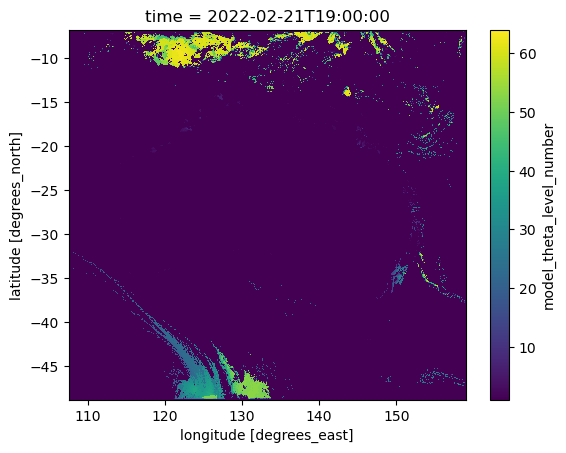

In [15]:
max_level.plot()

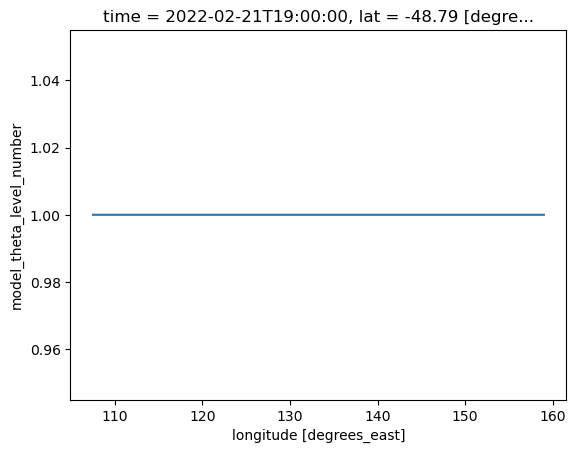

In [21]:
max_level[0,0,:].plot()

In [17]:
cldrad.theta_level_height.values

array([5.0000000e+00, 2.1666664e+01, 4.5000000e+01, 7.5000000e+01,
       1.1166668e+02, 1.5500000e+02, 2.0500000e+02, 2.6166668e+02,
       3.2500000e+02, 3.9500000e+02, 4.7166680e+02, 5.5500000e+02,
       6.4500000e+02, 7.4166680e+02, 8.4500000e+02, 9.5500000e+02,
       1.0716668e+03, 1.1950000e+03, 1.3250000e+03, 1.4616668e+03,
       1.6050000e+03, 1.7550000e+03, 1.9116668e+03, 2.0750000e+03,
       2.2450004e+03, 2.4216668e+03, 2.6050000e+03, 2.7950000e+03,
       2.9916668e+03, 3.1950000e+03, 3.4050000e+03, 3.6216668e+03,
       3.8450000e+03, 4.0750000e+03, 4.3116680e+03, 4.5550000e+03,
       4.8050000e+03, 5.0616680e+03, 5.3250000e+03, 5.5950000e+03,
       5.8716680e+03, 6.1550080e+03, 6.4451480e+03, 6.7424920e+03,
       7.0478160e+03, 7.3623600e+03, 7.6879200e+03, 8.0269280e+03,
       8.3825800e+03, 8.7589160e+03, 9.1609440e+03, 9.5947600e+03,
       1.0067668e+04, 1.0588308e+04, 1.1166796e+04, 1.1814868e+04,
       1.2546024e+04, 1.3375676e+04, 1.4321320e+04, 1.5402704e